# Placement Data Analysis and Logistic Regression Model

#Importing Libraries

In [122]:
#logistic regression - sigmoid sunction and it classifies binary
import numpy as np #used for handleling arrays
import pandas as pd #used for handleling dataframes
#It tells Jupyter to display Matplotlib plots directly inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #used for plotting graphs
from sklearn.preprocessing import LabelEncoder #For encoding the Label
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix

# Data Loading and Initial Inspection
This section focuses on loading the dataset and performing initial checks to understand its structure, content, and identify any missing values.

In [123]:
df = pd.read_csv('/content/Placement_Data_Full_Class.csv') #importing the dataset and creating dataframe df by reading the csv file
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


#Dataset Info

In [124]:
df.info()#feature datatypes are returned here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


##Quick statistical summary

In [125]:
df.describe()# its is very important to know this to data quality check and detect outliers and understand distributions

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Data Cleaning and Preprocessing
This section handles missing values and transforms categorical features into a numerical format suitable for machine learning models.

In [126]:
df.isnull().sum() #checking any null values are there

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [127]:
df.salary.isnull().sum() #in feature there are 67 null values (obervation)

np.int64(67)

In [128]:
df.isna().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [129]:
check_missing = df.isnull().sum()
check_missing


,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [130]:
df['salary']= df['salary'].fillna(df['salary'].mean())# we are filling the null values with the average of the feature salary instead of removing them now they contribute something to the ouput
df.head()
df.isna().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [131]:
df.nunique()

,0
sl_no,215
gender,2
ssc_p,103
ssc_b,2
hsc_p,97
hsc_b,2
hsc_s,3
degree_p,89
degree_t,3
workex,2


In [132]:
df.select_dtypes(include=object).nunique()

,0
gender,2
ssc_b,2
hsc_b,2
hsc_s,3
degree_t,3
workex,2
specialisation,2
status,2


In [133]:
df.drop('sl_no',axis=1,inplace=True)#not reallly contributing anything to the output


In [134]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [135]:
for col in df.select_dtypes(include =['object']).columns:#fetching the object types cause model only understand numbers
  print(col)
  print(df[col].unique())

gender
['M' 'F']
ssc_b
['Others' 'Central']
hsc_b
['Others' 'Central']
hsc_s
['Commerce' 'Science' 'Arts']
degree_t
['Sci&Tech' 'Comm&Mgmt' 'Others']
workex
['No' 'Yes']
specialisation
['Mkt&HR' 'Mkt&Fin']
status
['Placed' 'Not Placed']


In [136]:
from sklearn import preprocessing

for col in df.select_dtypes(include=['object']).columns:
  le = preprocessing.LabelEncoder()#using labelencoder cause there is an rank or specific order of the data and also better than OHE
  df[col] = le.fit_transform(df[col])
  print(df[col].unique())

[1 0]
[1 0]
[1 0]
[1 2 0]
[2 0 1]
[0 1]
[1 0]
[1 0]


In [137]:
df.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


In [138]:
df.head()#noww the model can understand the data so its in numeric form

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


# Model Training
This section covers splitting the data into training and testing sets and training a Logistic Regression model.

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [140]:
X = df.drop('status',axis=1)#apart from the status everything is included
y = df['status']#status is included

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)# the test size i have increased

In [142]:
# initialize the logistic regression model with specified solver and max iterations
# lbfgs is an optimization algorithm used to find the best model parameters
# the iteration will stop at 5000
logreg = LogisticRegression(solver='lbfgs',max_iter=5000)
y_pred = logreg.predict(X_test)
print(y_pred)

[1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0]


In [143]:
logreg.predict_proba(X_test)#it will show the preobability of which class (1\0)predicted datapoint of test data

array([[1.57722309e-02, 9.84227769e-01],
       [1.96826224e-01, 8.03173776e-01],
       [7.28535542e-02, 9.27146446e-01],
       [6.74439684e-01, 3.25560316e-01],
       [7.51059511e-02, 9.24894049e-01],
       [9.75473690e-01, 2.45263097e-02],
       [9.44196938e-01, 5.58030619e-02],
       [1.91983897e-02, 9.80801610e-01],
       [3.25596701e-02, 9.67440330e-01],
       [8.11598479e-04, 9.99188402e-01],
       [2.55786489e-01, 7.44213511e-01],
       [1.32900159e-02, 9.86709984e-01],
       [8.96773718e-01, 1.03226282e-01],
       [3.93437783e-02, 9.60656222e-01],
       [1.86148259e-03, 9.98138517e-01],
       [5.91567071e-01, 4.08432929e-01],
       [1.79290066e-03, 9.98207099e-01],
       [5.61177720e-01, 4.38822280e-01],
       [9.38024162e-01, 6.19758377e-02],
       [1.41059838e-03, 9.98589402e-01],
       [9.03340542e-03, 9.90966595e-01],
       [6.60490851e-04, 9.99339509e-01],
       [6.76461156e-01, 3.23538844e-01],
       [9.91015031e-01, 8.98496914e-03],
       [1.497210

# Model Evaluation
Here, we evaluate the performance of the initial Logistic Regression model using various metrics such as accuracy, classification report, confusion matrix, and ROC curve.

accuracy Score: 0.8462

cclassification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.87      0.91      0.89        44

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.82        65
weighted avg       0.84      0.85      0.84        65


Confusion Matrix:
[[15  6]
 [ 4 40]]


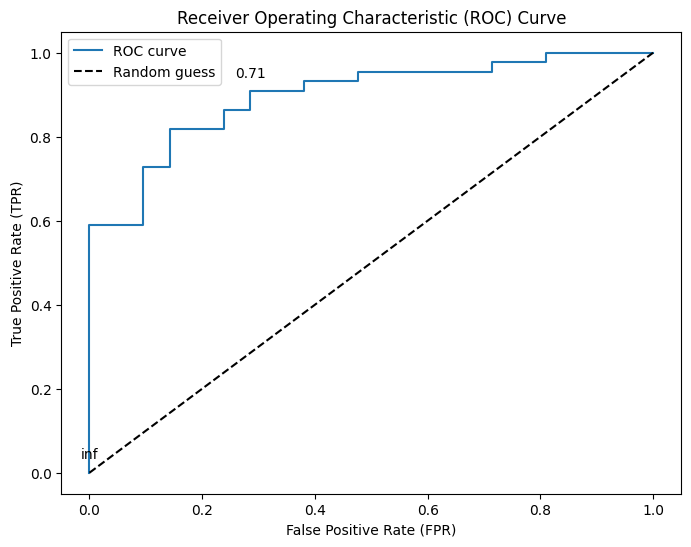


ROC AUC Score: 0.8961


In [144]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy Score: {accuracy:.4f}")
print("\ncclassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt

# Calculate ROC curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Annotate some thresholds on the curve
for i in range(0, len(thresholds), 10):  # Adjust step for desired number of annotations
    plt.annotate(f'{thresholds[i]:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

In the context of machine learning, particularly with models like Logistic Regression, a **solver** is an algorithm used to find the optimal parameters (coefficients) of the model that minimize the cost function. The cost function measures how well the model fits the training data. Different solvers use different mathematical approaches to search for these optimal parameters.

**L-BFGS** stands for **Limited-memory Broyden–Fletcher–Goldfarb–Shanno**. It is an optimization algorithm in the family of quasi-Newton methods. L-BFGS is popular for its efficiency, especially on large datasets, because it approximates the Hessian matrix (which describes the second-order partial derivatives of the cost function) without explicitly computing it, thus using less memory.

# Hyperparameter Tuning and Cross-Validation
This section focuses on improving the model's performance by tuning hyperparameters using GridSearchCV and cross-validation.

In [145]:
#HYPERPARAMETER TUNING AND CROSS VALIDATION
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [146]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [147]:
penality = ['l1','l2','elasticnet']# i wwanted to check out of alll these parameter which one is best (l1 =ridge ,l2 =lasso)
c_values =[100,10,1.0,0.1,0.01]#lest change the c_values(to avoid overfitting )
solver =["newton-cg","lbfgs","liblinear","sag",'saga']#doing the same

In [148]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cross_val=StratifiedKFold()
grid =GridSearchCV(estimator=model,param_grid =params,scoring = "accuracy",cv =cross_val,n_jobs=-1)

In [150]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [151]:
import warnings
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning

warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.84666667        nan 0.69333333 0.86
 0.84       0.78       0.69333333 0.69333333        nan        nan
        nan        nan        nan        nan        nan 0.84666667
        nan 0.69333333 0.86       0.83333333 0.78       0.69333333
 0.69333333        nan        nan        nan        nan        nan
        nan        nan 0.84              nan 0.69333333 0.88
 0.83333333 0.78       0.69333333 0.69333333        nan        nan
        nan        nan        nan        nan        nan 0.82
        nan 0.69333333 0.86666667 0.84666667 0.77333333 0.69333333
 0.69333333        nan        nan        nan        nan        nan
        nan        nan 0.72666667        nan 0.69333333 0.86
 0.84       0.76666667 0.69333333 0.69333333        nan        nan
        nan        nan        nan]
  warnings.warn(
/usr/local/lib/python3.11/d

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [210]:
# print the best hyperparameters found by grid search
grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [211]:
# print the best cross-validation score
grid.best_score_

np.float64(0.8800000000000001)

In [212]:
# make predictions on the test data using the best model from grid search
y_pred=grid.predict(X_test)

# Model Evaluation after Tuning
We re-evaluate the model's performance after hyperparameter tuning to see the impact of the optimization.

In [213]:
# calculate and print the accuracy score of the best model
score=accuracy_score(y_pred,y_test)
print(score)
# print the classification report of the best model
print(classification_report(y_pred,y_test))
# print the confusion matrix of the best model
print(confusion_matrix(y_pred,y_test))

0.8153846153846154
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.91      0.83      0.87        48

    accuracy                           0.82        65
   macro avg       0.76      0.80      0.78        65
weighted avg       0.83      0.82      0.82        65

[[13  4]
 [ 8 40]]


## Conclusion

This notebook demonstrates an analysis of placement data and the development of a Logistic Regression model to predict placement status.

**Key Findings:**

* Missing values in the 'salary' column were imputed using the mean.
* Categorical features were encoded into a numerical format.
* The initial Logistic Regression model achieved an accuracy of **0.8462**.
* Hyperparameter tuning improved the model's performance, resulting in an accuracy of **0.8154**.
* ROC curve analysis was performed to evaluate the model's ability to distinguish between placed and not placed students (ROC AUC Score: **0.8961**).

**Further Improvements:**

* Explore other classification algorithms.
* Conduct more in-depth feature engineering.
* Investigate the impact of outliers.
* Implement cross-validation during initial training.

**References:**

* Scikit-learn Documentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
* Pandas Documentation: [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)
* NumPy Documentation: [https://numpy.org/doc/](https://numpy.org/doc/)
* Matplotlib Documentation: [https://matplotlib.org/stable/](https://matplotlib.org/stable/)
* Seaborn Documentation: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

---

Created by: Charan N, 6th Sem, MIT Mysore

Feel free to reach out for any questions or collaborations.